# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
import json

from IPython.display import Image

import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Visually we can detect tidiness issues: 

- there is not particular need for dog stages (`doggo`, `floofer`, `pupper`, `puppo`) to be separated into 4 different columns

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

In [4]:
# Save response to a tsv file
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [5]:
predictions = pd.read_csv('image-predictions.tsv',sep='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Visually, we can already detect quality issues:

- some predicted dog breeds are capitalized (like Doberman), others not (like bloodhound) which may lead to duplicated values. 

- there are also non explicit column names for predictions (for example, `p1`, `p1_conf`, `p1_dog`)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
import tweepy

#keys are hidden for security purposes
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
#we would like to assess tweets extraction, how many tweets are extracted and how many failed.
done = []
failed = []

with open('tweet_json.txt', 'w') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet._json, f)
            done.append(tweet_id)
            f.write('\n')
        except:
            failed.append(tweet_id)
            pass
        
print("extracted tweets: ", len(done))
print("not extracted: ", len(failed))

In [7]:
#Loading JSON into pandas dataframe
tweets = pd.read_json('tweet_json.txt', lines = True, encoding='utf-8')
tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


Visual assement suggests that there are some quality issues: 

- twitter id column name (`id`) is not valid if we want to link the 3 dataframes (it's `id_tweet` in other tables)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Several quality issues can be found in `twitter_archive.csv`: 
- "None" is not a NaN dtype in doggo, floofer, pupper, puppo columns
- in_reply and retweeted (with all variations) data are not useful since we are only interested in original tweets
- timestamp column is not a datetime dtype

In [9]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


One more quality issue:

- 0 in numerator and denominator columns

In [10]:
twitter_archive.duplicated().sum()

0

In [11]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
predictions.duplicated().sum()

0

In [14]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2327 non-null   datetime64[ns, UTC]
 1   id                             2327 non-null   int64              
 2   id_str                         2327 non-null   int64              
 3   full_text                      2327 non-null   object             
 4   truncated                      2327 non-null   bool               
 5   display_text_range             2327 non-null   object             
 6   entities                       2327 non-null   object             
 7   extended_entities              2057 non-null   object             
 8   source                         2327 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

Quality issues: 

- `in_reply` and `is_quote` (with all other variations) data are not useful since we are only interested in original tweets

### Quality issues

I. `twitter_archive.csv`
	
1. "None" is not a NaN dtype in `doggo`, `floofer`, `pupper`, `puppo` columns
2. `in_reply` and `retweeted` (with all variations) data are not useful since we are only interested in original tweets
3. `timestamp` column is not a datetime dtype
4. invalid values in nominator and denominator columns (0)
    
II. `predictions.csv`
	
5. some predicted dog breeds are capitalized, others not
6. non explicit column names for predictions

III. `tweets.csv`
    
7. `id` column name is not valid to link this dataframe to 2 others (it's `id_tweet` in other tables)
8. `in_reply` and `is_quote` (with all other variations) data are not useful since we are only interested in original tweets

### Tidiness issues

I. `twitter_archive.csv`
	
9. `doggo`, `floofer`, `pupper`, `puppo` are in separate columns for no particular reason
    
II. `twitter_archive.csv`, `predictions.csv`, `tweets.csv`

10. All the three dataframes can be merged on `tweet_id`, after dropping non relevant columns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [15]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
predictions_clean = predictions.copy()
tweets_clean = tweets.copy()

### Issue #1: 

#### Define: 

Replace the string "None" with NaN dtype in `doggo`, `floofer`, `pupper`, `puppo` columns in `twitter_archive.csv`

#### Code

In [16]:
twitter_archive_clean = twitter_archive_clean.replace('None', np.nan)

#### Test

In [17]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

### Issue #2:

#### Define

Remove `in_reply` and `retweeted` data in `twitter_archive.csv` and drop irrelevant columns

#### Code

In [18]:
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean['in_reply_to_status_id'].notna()]
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean['retweeted_status_id'].notna()]

In [19]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
                             'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [20]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                1494 non-null   object
 8   doggo               83 non-null     object
 9   floofer             10 non-null     object
 10  pupper              230 non-null    object
 11  puppo               24 non-null     object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


At this point we can reiterate and remove other columns that are of no use for our study:

In [21]:
twitter_archive_clean.drop(['source'], axis=1, inplace=True)

In [22]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   text                2097 non-null   object
 3   expanded_urls       2094 non-null   object
 4   rating_numerator    2097 non-null   int64 
 5   rating_denominator  2097 non-null   int64 
 6   name                1494 non-null   object
 7   doggo               83 non-null     object
 8   floofer             10 non-null     object
 9   pupper              230 non-null    object
 10  puppo               24 non-null     object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


### Issue #3:

#### Define

Transform `timestamp` from string to datetime dtype in `twitter_archive.csv`

#### Code

In [23]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [24]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   expanded_urls       2094 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                1494 non-null   object             
 7   doggo               83 non-null     object             
 8   floofer             10 non-null     object             
 9   pupper              230 non-null    object             
 10  puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 196.6+ KB


### Issue #4:

#### Define

Remove invalid values in nominator and denominator columns (for instance, 0) in `twitter_archive.csv`

#### Code

In [25]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_numerator'] != 0]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 0]

#### Test

In [26]:
twitter_archive_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.096000e+03,2096.000000,2096.00000
mean,7.365123e+17,12.195134,10.44895
std,6.708321e+16,40.373750,6.64664
min,6.660209e+17,1.000000,2.00000
25%,6.768177e+17,10.000000,10.00000
50%,7.097095e+17,11.000000,10.00000
75%,7.874779e+17,12.000000,10.00000
max,8.924206e+17,1776.000000,170.00000


### Issue #5:

#### Define

Lowercase all predicted dog breeds in `predictions.csv`

#### Code

In [27]:
predictions_clean['p1'] = predictions_clean['p1'].str.lower()
predictions_clean['p2'] = predictions_clean['p2'].str.lower()
predictions_clean['p3'] = predictions_clean['p3'].str.lower()

#### Test

In [28]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #6:

#### Define

Rename prediction columns in `predictions.csv` with more explicite names

#### Code

In [29]:
predictions_clean.rename(columns={'p1': '1st_prediction', 
                                  'p1_conf': '1st_confidence',
                                 'p1_dog': '1st_isDog',
                                 'p2': '2d_prediction', 
                                  'p2_conf': '2d_confidence',
                                 'p2_dog': '2d_isDog',
                                 'p3': '3d_prediction', 
                                  'p3_conf': '3d_confidence',
                                 'p3_dog': '3d_isDog'}, inplace=True)

#### Test

In [30]:
predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', '1st_prediction', '1st_confidence',
       '1st_isDog', '2d_prediction', '2d_confidence', '2d_isDog',
       '3d_prediction', '3d_confidence', '3d_isDog'],
      dtype='object')

### Issue #7:

#### Define

Rename `id` column in `tweets.csv` to `tweet_id`

#### Code

In [31]:
tweets_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [32]:
tweets_clean.columns

Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

### Issue #8:

#### Define

Drop `in_reply` and `is_quote` data in `tweets.csv`; remove non relevant columns

#### Code

In [33]:
tweets_clean = tweets_clean[~tweets_clean['in_reply_to_status_id'].notna()]
tweets_clean = tweets_clean[~tweets_clean['quoted_status_id'].notna()]

In [34]:
tweets_clean.drop(['in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id',
                  'in_reply_to_user_id_str','in_reply_to_screen_name',
                  'quoted_status_id','quoted_status_id_str','quoted_status_permalink','quoted_status'],
                  axis=1,inplace=True)

#### Test

In [35]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 0 to 2326
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2224 non-null   datetime64[ns, UTC]
 1   tweet_id                       2224 non-null   int64              
 2   id_str                         2224 non-null   int64              
 3   full_text                      2224 non-null   object             
 4   truncated                      2224 non-null   bool               
 5   display_text_range             2224 non-null   object             
 6   entities                       2224 non-null   object             
 7   extended_entities              2034 non-null   object             
 8   source                         2224 non-null   object             
 9   user                           2224 non-null   object             
 10  geo                     

We reiterate and drop some other irrelevant columns:

In [36]:
tweets_clean.drop(['created_at','truncated','display_text_range','entities','extended_entities','source','user',
                   'geo','coordinates','place','contributors','is_quote_status','favorited','retweeted',
                  'possibly_sensitive','possibly_sensitive_appealable','lang','retweeted_status','id_str','full_text'],
                  axis=1,inplace=True)

In [37]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2224 non-null   int64
 1   retweet_count   2224 non-null   int64
 2   favorite_count  2224 non-null   int64
dtypes: int64(3)
memory usage: 69.5 KB


### Issue #9:

#### Define

Merge data from `doggo`, `floofer`, `pupper`, `puppo` in one column `dog_class` in `twitter_archive.csv`

#### Code

In [38]:
twitter_archive_clean.loc[twitter_archive_clean['doggo'] == 'doggo', 'dog_class'] = 'doggo'
twitter_archive_clean.loc[twitter_archive_clean['floofer'] == 'floofer', 'dog_class'] = 'floofer'
twitter_archive_clean.loc[twitter_archive_clean['pupper'] == 'pupper', 'dog_class'] = 'pupper'
twitter_archive_clean.loc[twitter_archive_clean['puppo'] == 'puppo', 'dog_class'] = 'puppo'

In [39]:
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

#### Test

In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2096 non-null   int64              
 1   timestamp           2096 non-null   datetime64[ns, UTC]
 2   text                2096 non-null   object             
 3   expanded_urls       2093 non-null   object             
 4   rating_numerator    2096 non-null   int64              
 5   rating_denominator  2096 non-null   int64              
 6   name                1494 non-null   object             
 7   dog_class           336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 147.4+ KB


### Issue #10:

#### Define

Merge the 3 data frames on `tweet_id`

#### Code

In [41]:
all_data = pd.merge(twitter_archive_clean, predictions_clean, on=['tweet_id'])

In [42]:
all_data = pd.merge(all_data, tweets_clean, on=['tweet_id'])

#### Test

In [43]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1961
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1962 non-null   int64              
 1   timestamp           1962 non-null   datetime64[ns, UTC]
 2   text                1962 non-null   object             
 3   expanded_urls       1962 non-null   object             
 4   rating_numerator    1962 non-null   int64              
 5   rating_denominator  1962 non-null   int64              
 6   name                1440 non-null   object             
 7   dog_class           302 non-null    object             
 8   jpg_url             1962 non-null   object             
 9   img_num             1962 non-null   int64              
 10  1st_prediction      1962 non-null   object             
 11  1st_confidence      1962 non-null   float64            
 12  1st_isDog           1962 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [44]:
all_data.to_csv("twitter_archive_master.csv",sep='\t',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [45]:
twitter_data = pd.read_csv("twitter_archive_master.csv",sep='\t')
twitter_data.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,jpg_url,img_num,...,1st_confidence,1st_isDog,2d_prediction,2d_confidence,2d_isDog,3d_prediction,3d_confidence,3d_isDog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7102,34218
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,5350,29677
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3520,22349
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,7303,37392
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,7848,35743


### Insights:


1. The rating given to the dogs by WeRateDogs profile is genearlly correlated to high number of retweets and likes.

Overall, 50% of tweets were retwitted more than 1101 times. As for the top 10 highest ratings, 9 of 10 tweets were retwitted more than 1101 times. 

Overall, 50% of tweets have more than 3532 likes. As for the top 10 highest ratings, again, 9 of 10 tweets have more than 3532 times. 

Among top-10 dog ratings only the row with index 1351 is above the median both for retweet and favourite counts.

In [46]:
twitter_data['rating'] = twitter_data['rating_numerator'] / twitter_data['rating_denominator']

In [47]:
twitter_data[['rating_numerator','rating_denominator','retweet_count','favorite_count','rating']].describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,rating
count,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000
mean,12.230377,10.479613,2288.508155,7845.168196,1.169971
std,41.728475,6.868907,4094.038042,11560.561979,4.099917
min,1.000000,2.000000,11.000000,67.000000,0.100000
25%,10.000000,10.000000,508.000000,1670.250000,1.000000
50%,11.000000,10.000000,1101.500000,3532.000000,1.100000
75%,12.000000,10.000000,2604.750000,9747.500000,1.200000
max,1776.000000,170.000000,71734.000000,146524.000000,177.600000


In [48]:
twitter_data.sort_values('rating',ascending=False)[['text','1st_prediction','rating_numerator','rating_denominator',
                                                   'retweet_count','favorite_count','rating']][:10]

,text,1st_prediction,rating_numerator,rating_denominator,retweet_count,favorite_count,rating
714,This is Atticus. He's quite simply America af....,bow_tie,1776,10,2305,4835,177.600000
1687,After so many requests... here you go.\n\nGood...,microphone,420,10,7690,22357,42.000000
494,"This is Logan, the Chow who lived. He solemnly...",pomeranian,75,10,5807,17575,7.500000
377,Meet Sam. She smiles 24/7 &amp; secretly aspir...,golden_retriever,24,7,1348,5119,3.428571
543,This is Sophie. She's a Jubilant Bush Pupper. ...,clumber,27,10,1510,6269,2.700000
1351,Here we have uncovered an entire battalion of ...,kuvasz,26,10,448,1593,2.600000
64,This is Emmy. She was adopted today. Massive r...,french_bulldog,14,10,5803,37604,1.400000
310,This is Sundance. He's a doggo drummer. Even s...,irish_setter,14,10,4051,11228,1.400000
49,Here is a pupper approaching maximum borkdrive...,samoyed,14,10,13566,43963,1.400000
150,Sometimes you guys remind me just how impactfu...,black-and-tan_coonhound,14,10,6704,29588,1.400000


We will explore some of the most rated dogs

Dog with the american flag (classified as bow tie)

In [49]:
twitter_data['expanded_urls'].iloc[714]

'https://twitter.com/dog_rates/status/749981277374128128/photo/1'

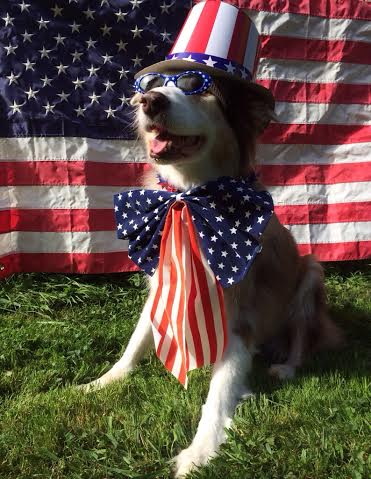

In [50]:
Image(twitter_data['jpg_url'].iloc[714])

Snoop Dog... (classified as micropone)

In [51]:
twitter_data['expanded_urls'].iloc[1687]

'https://twitter.com/dog_rates/status/670842764863651840/photo/1'

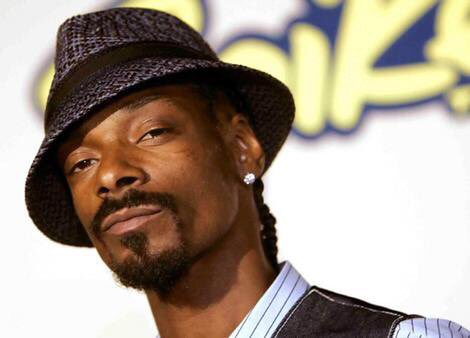

In [52]:
Image(twitter_data['jpg_url'].iloc[1687])

A chow with 9.75/10, wich was extracted as with numerator 75, so this is definitely not the 3d most rated dog!

In [54]:
twitter_data['expanded_urls'].iloc[494]

'https://twitter.com/dog_rates/status/786709082849828864/photo/1'

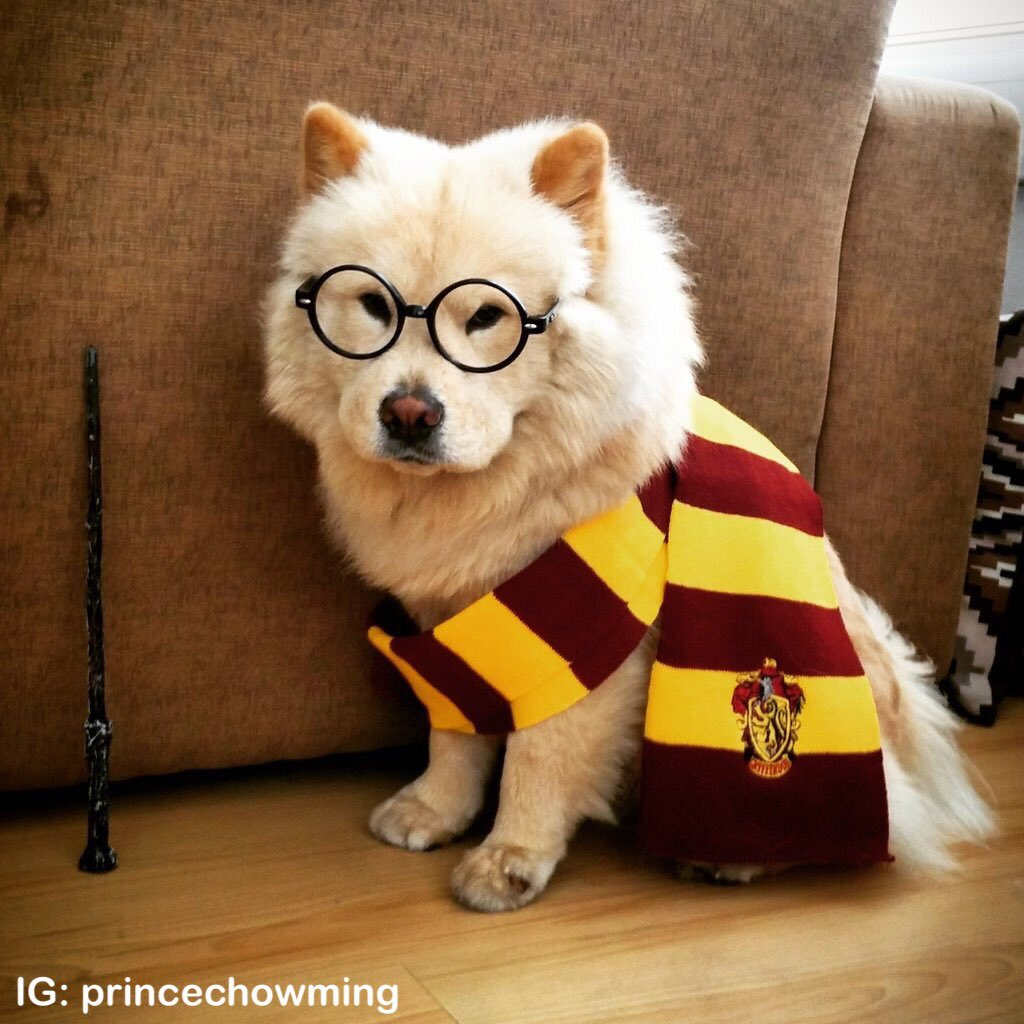

In [53]:
Image(twitter_data['jpg_url'].iloc[494])

Dog as a raindeer :)

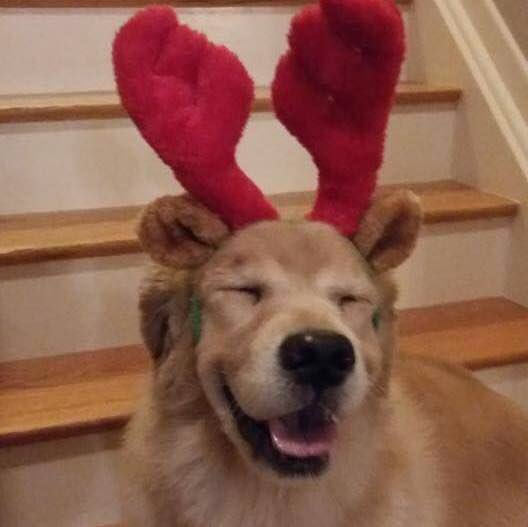

In [55]:
Image(twitter_data['jpg_url'].iloc[377])

2. Overall, the first model prediction has the highest confidence scores than the 2d and the 3d predictions. We will use these first rusults in out analysis

In [56]:
twitter_data[['1st_confidence','2d_confidence','3d_confidence']].describe()

,1st_confidence,2d_confidence,3d_confidence
count,1962.000000,1.962000e+03,1.962000e+03
mean,0.593876,1.347144e-01,6.029500e-02
std,0.272074,1.009553e-01,5.096987e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.362857,5.361625e-02,1.621080e-02
50%,0.587357,1.174550e-01,4.947920e-02
75%,0.846897,1.955692e-01,9.159438e-02
max,1.000000,4.880140e-01,2.734190e-01


3. The most liked and retwitted dogs are labrador retreivers, eskimo dogs, chihuahua and lakeland terriers.

According to the 1st model results, the most retwitted dogs are labrador retriever, eskimo dog, chihuahua, lakeland terrier and english springer. 

The most liked ones are labrador retriever, lakeland terrier, chihuahua, french bulldog nad eskimo dog. 

In [57]:
twitter_data.sort_values('retweet_count',ascending=False)[['text','dog_class','1st_prediction',
                                                   'retweet_count','favorite_count','rating']][:10]

,text,dog_class,1st_prediction,retweet_count,favorite_count,rating
761,Here's a doggo realizing you can stand in a po...,doggo,labrador_retriever,71734,146524,1.3
796,Here's a doggo blowing bubbles. It's downright...,doggo,eskimo_dog,53608,108443,1.3
392,This is Stephan. He just wants to help. 13/10 ...,NaN,chihuahua,52414,113108,1.3
301,Here's a super supportive puppo participating ...,puppo,lakeland_terrier,40511,125607,1.3
58,This is Duddles. He did an attempt. 13/10 some...,NaN,english_springer,37939,93981,1.3
325,This is Bo. He was a very good First Doggo. 14...,doggo,standard_poodle,34994,83596,1.4
394,"""Good afternoon class today we're going to lea...",NaN,arabian_camel,32825,71494,1.3
107,This is Jamesy. He gives a kiss to every other...,pupper,french_bulldog,30654,110184,1.3
1400,This made my day. 12/10 please enjoy https://t...,NaN,swing,29029,74473,1.2
1458,This is Kenneth. He's stuck in a bubble. 10/10...,NaN,bubble,28044,70379,1.0


THE most retwitted! "doggo realizing you can stand in a pool"

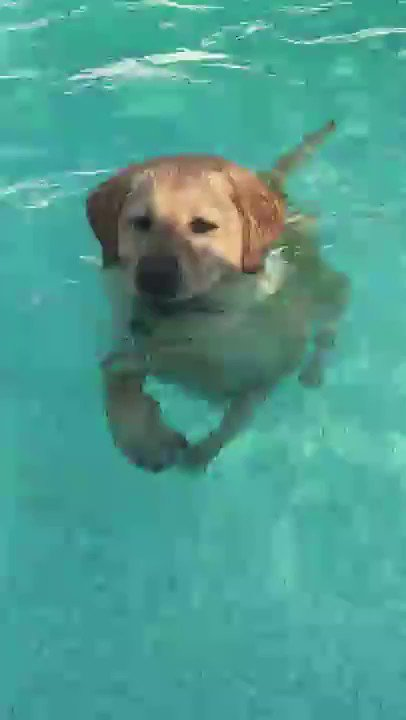

In [58]:
Image(twitter_data['jpg_url'].iloc[761])

*Errors*

Model predicts arabian camel ? Probably because of the shapes found in both pictures ?

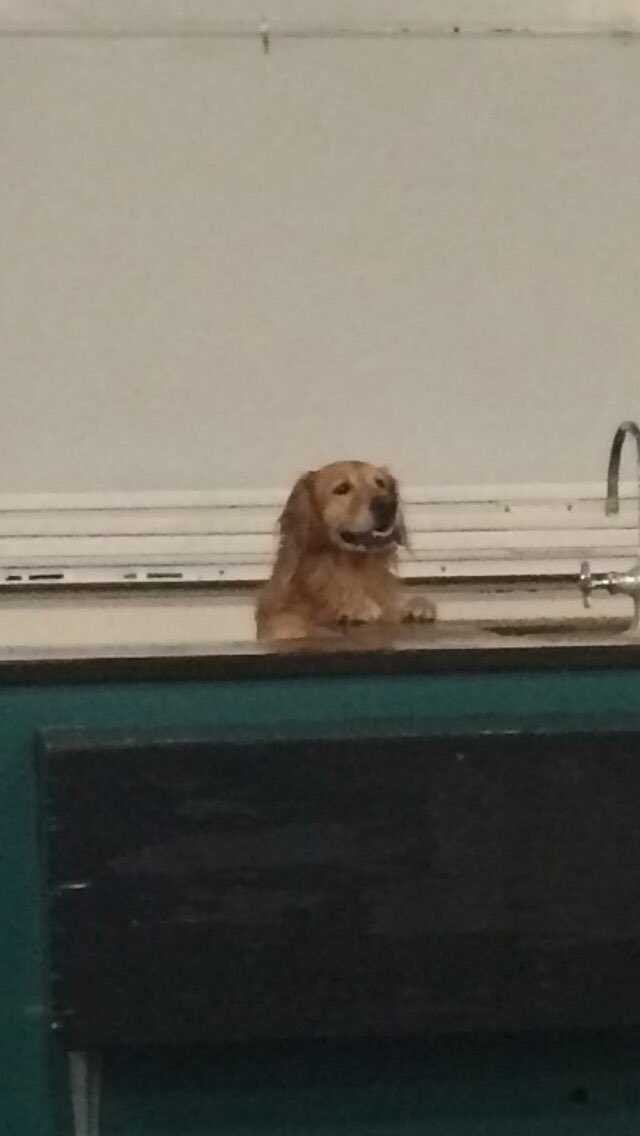

In [59]:
Image(twitter_data['jpg_url'].iloc[394])

Well, there is indeed a swing on this video!

In [60]:
twitter_data['expanded_urls'].iloc[1400]

'https://twitter.com/dog_rates/status/678399652199309312/video/1'

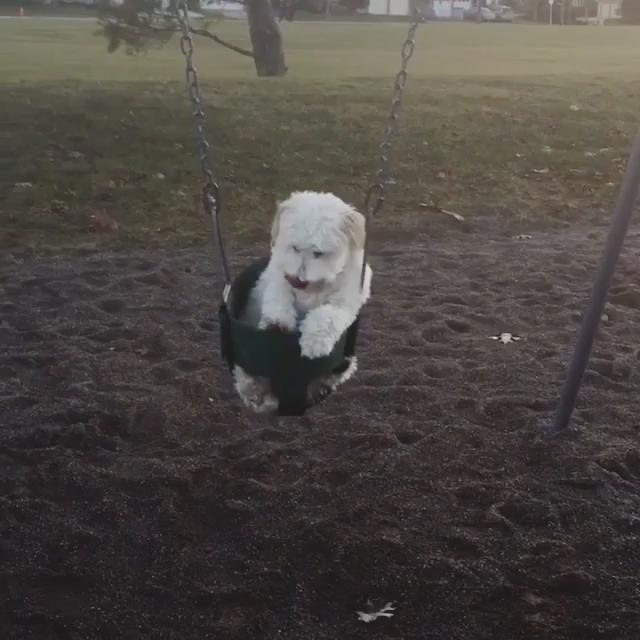

In [61]:
Image(twitter_data['jpg_url'].iloc[1400])

.. and here is the bubble!

In [62]:
twitter_data['expanded_urls'].iloc[1458]

'https://twitter.com/dog_rates/status/676219687039057920/photo/1'

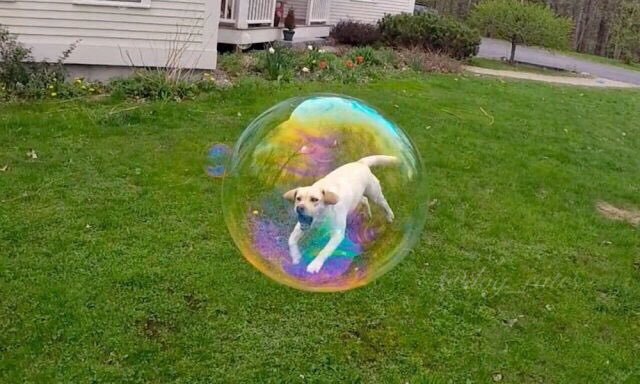

In [63]:
Image(twitter_data['jpg_url'].iloc[1458])

In [64]:
twitter_data.sort_values('favorite_count',ascending=False)[['text','dog_class','1st_prediction',
                                                   'retweet_count','favorite_count','rating']][:10]

,text,dog_class,1st_prediction,retweet_count,favorite_count,rating
761,Here's a doggo realizing you can stand in a po...,doggo,labrador_retriever,71734,146524,1.3
301,Here's a super supportive puppo participating ...,puppo,lakeland_terrier,40511,125607,1.3
392,This is Stephan. He just wants to help. 13/10 ...,NaN,chihuahua,52414,113108,1.3
107,This is Jamesy. He gives a kiss to every other...,pupper,french_bulldog,30654,110184,1.3
796,Here's a doggo blowing bubbles. It's downright...,doggo,eskimo_dog,53608,108443,1.3
58,This is Duddles. He did an attempt. 13/10 some...,NaN,english_springer,37939,93981,1.3
325,This is Bo. He was a very good First Doggo. 14...,doggo,standard_poodle,34994,83596,1.4
133,We only rate dogs. This is quite clearly a smo...,NaN,angora,26632,81585,1.2
92,This is Zoey. She really likes the planet. Wou...,NaN,golden_retriever,23058,74904,1.3
1400,This made my day. 12/10 please enjoy https://t...,NaN,swing,29029,74473,1.2


THE most liked! The samme doggo standing in the pool ^^

In [65]:
twitter_data['expanded_urls'].iloc[761]

'https://twitter.com/dog_rates/status/744234799360020481/video/1'

*Errors*

Well, it's not an angora, but quite close, it is a samoyed ^^

In [66]:
twitter_data['expanded_urls'].iloc[133]

'https://twitter.com/dog_rates/status/859196978902773760/video/1'

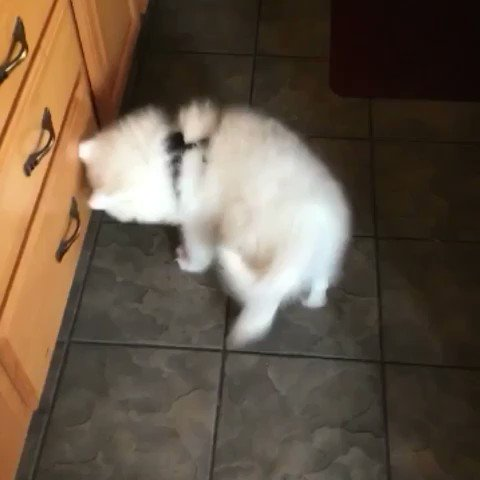

In [67]:
Image(twitter_data['jpg_url'].iloc[133])

### Visualization

Thre are a lot of dogs which may appear in WeRateDogs feed, but here is the list of the most frequent dogs, according to the classification model.

/home/natasha/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


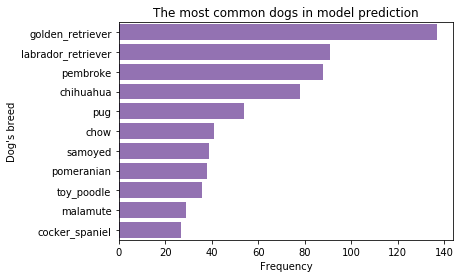

In [68]:
dogs_pred = twitter_data.groupby('1st_prediction').filter(lambda x: len(x) > 25)
dog_types = dogs_pred['1st_prediction'].value_counts()

sns.barplot(dog_types, dog_types.index.values, color=sns.color_palette()[4])

plt.title('The most common dogs in model prediction')
plt.xlabel('Frequency')
plt.ylabel("Dog's breed");